<a href="https://colab.research.google.com/github/Shyam-Singh-Bhargaw/python-code/blob/main/webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

In [ ]:
data = pd.read_excel("C:\\Users\\thesh\\Downloads\\Input.xlsx")

In [ ]:
data

,URL_ID,URL
0,123.0,https://insights.blackcoffer.com/rise-of-telem...
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...
4,432.0,https://insights.blackcoffer.com/rise-of-telem...
...,...,...
109,50921.0,https://insights.blackcoffer.com/coronavirus-i...
110,51382.8,https://insights.blackcoffer.com/coronavirus-i...
111,51844.6,https://insights.blackcoffer.com/what-are-the-...
112,52306.4,https://insights.blackcoffer.com/marketing-dri...


In [ ]:
# Define the extract_data function
def extract_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
    except requests.exceptions.HTTPError as e:
        print(f"HTTP error occurred for {url}: {e}")
        return None, None
    except requests.exceptions.RequestException as e:
        print(f"Request error occurred for {url}: {e}")
        return None, None

    soup = BeautifulSoup(response.text, 'html.parser')


    title_elements = soup.find_all('h1')
    text_elements = soup.find_all('p')
    # Extract the title text
    article_title = ""
    for title_element in title_elements:
        article_title += title_element.text.strip() + " "

    # Extract the text content
    article_text = ""
    for text_element in text_elements:
        article_text += text_element.text.strip() + " "

    return article_title, article_text

# List of URLs
urls = ["https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/",
"https://insights.blackcoffer.com/rise-of-e-health-and-its-impact-on-humans-by-the-year-2030/",
"https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030-2/",
"https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2/",
"https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2-2/",
"https://insights.blackcoffer.com/rise-of-chatbots-and-its-impact-on-customer-support-by-the-year-2040/",
"https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030/",
"https://insights.blackcoffer.com/how-does-marketing-influence-businesses-and-consumers/",
"https://insights.blackcoffer.com/how-advertisement-increase-your-market-value/",
"https://insights.blackcoffer.com/negative-effects-of-marketing-on-society/",
"https://insights.blackcoffer.com/how-advertisement-marketing-affects-business/",
"https://insights.blackcoffer.com/rising-it-cities-will-impact-the-economy-environment-infrastructure-and-city-life-by-the-year-2035/",
"https://insights.blackcoffer.com/rise-of-ott-platform-and-its-impact-on-entertainment-industry-by-the-year-2030/",
"https://insights.blackcoffer.com/rise-of-electric-vehicles-and-its-impact-on-livelihood-by-2040/",
"https://insights.blackcoffer.com/rise-of-electric-vehicle-and-its-impact-on-livelihood-by-the-year-2040/",
"https://insights.blackcoffer.com/oil-prices-by-the-year-2040-and-how-it-will-impact-the-world-economy/",
"https://insights.blackcoffer.com/an-outlook-of-healthcare-by-the-year-2040-and-how-it-will-impact-human-lives/",
"https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/",
"https://insights.blackcoffer.com/what-if-the-creation-is-taking-over-the-creator/",
"https://insights.blackcoffer.com/what-jobs-will-robots-take-from-humans-in-the-future/",
"https://insights.blackcoffer.com/will-machine-replace-the-human-in-the-future-of-work/",
"https://insights.blackcoffer.com/will-ai-replace-us-or-work-with-us/",
"https://insights.blackcoffer.com/man-and-machines-together-machines-are-more-diligent-than-humans-blackcoffe/",
"https://insights.blackcoffer.com/in-future-or-in-upcoming-years-humans-and-machines-are-going-to-work-together-in-every-field-of-work/",
"https://insights.blackcoffer.com/how-neural-networks-can-be-applied-in-various-areas-in-the-future/",
"https://insights.blackcoffer.com/how-machine-learning-will-affect-your-business/",
"https://insights.blackcoffer.com/deep-learning-impact-on-areas-of-e-learning/",
"https://insights.blackcoffer.com/how-to-protect-future-data-and-its-privacy-blackcoffer/",
"https://insights.blackcoffer.com/how-machines-ai-automations-and-robo-human-are-effective-in-finance-and-banking/",
"https://insights.blackcoffer.com/ai-human-robotics-machine-future-planet-blackcoffer-thinking-jobs-workplace/",
"https://insights.blackcoffer.com/how-ai-will-change-the-world-blackcoffer/",
"https://insights.blackcoffer.com/future-of-work-how-ai-has-entered-the-workplace/",
"https://insights.blackcoffer.com/ai-tool-alexa-google-assistant-finance-banking-tool-future/",
"https://insights.blackcoffer.com/ai-healthcare-revolution-ml-technology-algorithm-google-analytics-industrialrevolution/",
"https://insights.blackcoffer.com/all-you-need-to-know-about-online-marketing/",
"https://insights.blackcoffer.com/evolution-of-advertising-industry/",
"https://insights.blackcoffer.com/how-data-analytics-can-help-your-business-respond-to-the-impact-of-covid-19/",
"https://insights.blackcoffer.com/covid-19-environmental-impact-for-the-future/",
"https://insights.blackcoffer.com/environmental-impact-of-the-covid-19-pandemic-lesson-for-the-future/",
"https://insights.blackcoffer.com/how-data-analytics-and-ai-are-used-to-halt-the-covid-19-pandemic/",
"https://insights.blackcoffer.com/difference-between-artificial-intelligence-machine-learning-statistics-and-data-mining/",
"https://insights.blackcoffer.com/how-python-became-the-first-choice-for-data-science/",
"https://insights.blackcoffer.com/how-google-fit-measure-heart-and-respiratory-rates-using-a-phone/",
"https://insights.blackcoffer.com/what-is-the-future-of-mobile-apps/",
"https://insights.blackcoffer.com/impact-of-ai-in-health-and-medicine/",
"https://insights.blackcoffer.com/telemedicine-what-patients-like-and-dislike-about-it/",
"https://insights.blackcoffer.com/how-we-forecast-future-technologies/",
"https://insights.blackcoffer.com/can-robots-tackle-late-life-loneliness/",
"https://insights.blackcoffer.com/embedding-care-robots-into-society-socio-technical-considerations/",
"https://insights.blackcoffer.com/management-challenges-for-future-digitalization-of-healthcare-services/",
"https://insights.blackcoffer.com/are-we-any-closer-to-preventing-a-nuclear-holocaust/",
"https://insights.blackcoffer.com/will-technology-eliminate-the-need-for-animal-testing-in-drug-development/",
"https://insights.blackcoffer.com/will-we-ever-understand-the-nature-of-consciousness/",
"https://insights.blackcoffer.com/will-we-ever-colonize-outer-space/",
"https://insights.blackcoffer.com/what-is-the-chance-homo-sapiens-will-survive-for-the-next-500-years/",
"https://insights.blackcoffer.com/why-does-your-business-need-a-chatbot/",
"https://insights.blackcoffer.com/how-you-lead-a-project-or-a-team-without-any-technical-expertise/",
"https://insights.blackcoffer.com/can-you-be-great-leader-without-technical-expertise/",
"https://insights.blackcoffer.com/how-does-artificial-intelligence-affect-the-environment/",
"https://insights.blackcoffer.com/how-to-overcome-your-fear-of-making-mistakes-2/",
"https://insights.blackcoffer.com/is-perfection-the-greatest-enemy-of-productivity/",
"https://insights.blackcoffer.com/global-financial-crisis-2008-causes-effects-and-its-solution/",
"https://insights.blackcoffer.com/gender-diversity-and-equality-in-the-tech-industry/",
"https://insights.blackcoffer.com/how-to-overcome-your-fear-of-making-mistakes/",
"https://insights.blackcoffer.com/how-small-business-can-survive-the-coronavirus-crisis/",
"https://insights.blackcoffer.com/impacts-of-covid-19-on-vegetable-vendors-and-food-stalls/",
"https://insights.blackcoffer.com/impacts-of-covid-19-on-vegetable-vendors/",
"https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-tourism-aviation-industries/",
"https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-sports-events-around-the-world/",
"https://insights.blackcoffer.com/changing-landscape-and-emerging-trends-in-the-indian-it-ites-industry/",
"https://insights.blackcoffer.com/online-gaming-adolescent-online-gaming-effects-demotivated-depression-musculoskeletal-and-psychosomatic-symptoms/",
"https://insights.blackcoffer.com/human-rights-outlook/",
"https://insights.blackcoffer.com/how-voice-search-makes-your-business-a-successful-business/",
"https://insights.blackcoffer.com/how-the-covid-19-crisis-is-redefining-jobs-and-services/",
"https://insights.blackcoffer.com/how-to-increase-social-media-engagement-for-marketers/",
"https://insights.blackcoffer.com/impacts-of-covid-19-on-streets-sides-food-stalls/",
"https://insights.blackcoffer.com/coronavirus-impact-on-energy-markets-2/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-5/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-4/",
"https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work-2/",
"https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work-3/",
"https://insights.blackcoffer.com/travel-and-tourism-outlook/",
"https://insights.blackcoffer.com/gaming-disorder-and-effects-of-gaming-on-health/",
"https://insights.blackcoffer.com/what-is-the-repercussion-of-the-environment-due-to-the-covid-19-pandemic-situation/",
"https://insights.blackcoffer.com/what-is-the-repercussion-of-the-environment-due-to-the-covid-19-pandemic-situation-2/",
"https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-office-space-and-co-working-industries/",
"https://insights.blackcoffer.com/contribution-of-handicrafts-visual-arts-literature-in-the-indian-economy/",
"https://insights.blackcoffer.com/how-covid-19-is-impacting-payment-preferences/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-2/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis/",
"https://insights.blackcoffer.com/covid-19-how-have-countries-been-responding/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-2/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-3/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-3/",
"https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work/",
"https://insights.blackcoffer.com/covid-19-how-have-countries-been-responding-2/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-4/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-2/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-3/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-4/",
"https://insights.blackcoffer.com/why-scams-like-nirav-modi-happen-with-indian-banks/",
"https://insights.blackcoffer.com/impact-of-covid-19-on-the-global-economy/",
"https://insights.blackcoffer.com/impact-of-covid-19coronavirus-on-the-indian-economy-2/",
"https://insights.blackcoffer.com/impact-of-covid-19-on-the-global-economy-2/",
"https://insights.blackcoffer.com/impact-of-covid-19-coronavirus-on-the-indian-economy-3/",
"https://insights.blackcoffer.com/should-celebrities-be-allowed-to-join-politics/",
"https://insights.blackcoffer.com/how-prepared-is-india-to-tackle-a-possible-covid-19-outbreak/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work/",
"https://insights.blackcoffer.com/controversy-as-a-marketing-strategy/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry/",
"https://insights.blackcoffer.com/coronavirus-impact-on-energy-markets/",
"https://insights.blackcoffer.com/what-are-the-key-policies-that-will-mitigate-the-impacts-of-covid-19-on-the-world-of-work/",
"https://insights.blackcoffer.com/marketing-drives-results-with-a-focus-on-problems/",
"https://insights.blackcoffer.com/continued-demand-for-sustainability/"


]

# Create a directory to store the extracted data as text files
output_directory = "extracted_data"
os.makedirs(output_directory, exist_ok=True)

# Iterate through the URLs and extract data one by one
for url in urls:
    article_title, article_text = extract_data(url)

    # Create a filename based on the URL
    filename = os.path.join(output_directory, f"{url.split('/')[-2]}.txt")

    # Save the extracted data as text files
    if article_title and article_text:
        with open(filename, 'w', encoding='utf-8') as file:
            file.write(f"Title: {article_title}\n\n")
            file.write(f"Text: {article_text}")

    print(f"Data extraction complete for {url}")

print("All data extraction is complete.")


Data extraction complete for https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/
Data extraction complete for https://insights.blackcoffer.com/rise-of-e-health-and-its-impact-on-humans-by-the-year-2030/
Data extraction complete for https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030-2/
Data extraction complete for https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2/
Data extraction complete for https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2-2/
Data extraction complete for https://insights.blackcoffer.com/rise-of-chatbots-and-its-impact-on-customer-support-by-the-year-2040/


In [ ]:
import os
import string
from nltk.tokenize import word_tokenize

In [ ]:


# Define the directory where your extracted text files are stored
extracted_data_directory = "C:\\Users\\thesh\\OneDrive\\Desktop\\jupyter\\extracted_data"

# Create an empty list to store the text data from all files
text_data_list = []

# Loop through each file in the directory
for filename in os.listdir(extracted_data_directory):
    # Check if the file is a text file (you may need to adjust the condition)
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(extracted_data_directory, filename)

        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data = file.read()

        # Append the text data to the list
        text_data_list.append(text_data)

# Now, text_data_list contains the text data from all extracted files
# You can access each article's text using text_data_list[index]


In [ ]:
# Check the number of articles loaded
print(f"Number of articles loaded: {len(text_data_list)}")

# Print the first few characters of the first article's text
if len(text_data_list) > 0:
    print("First few characters of the first article's text:")
    print(text_data_list[0][:200])  # Print the first 200 characters as an example


Number of articles loaded: 112
First few characters of the first article's text:
Title: How AI will impact the future of work? 

Text: Automate the Data Management Process Realtime Kibana Dashboard for a financial tech firm Data Management, ETL, and Data Automation Data Management


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:


# Download nltk resources if not already installed
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenization: Split text into words or tokens
    tokens = word_tokenize(text)

    # Remove punctuation and special characters
    tokens = [word for word in tokens if word.isalnum()]

    # Convert text to lowercase
    tokens = [word.lower() for word in tokens]

    # Remove stopwords (common words like "the," "and," "is," etc.)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization: Reduce words to their base or root form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the preprocessed tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Example usage:
# Let's say you have an article text in the variable 'article_text'
article_text = text_data_list[0]  # Replace with the desired article's text
preprocessed_article_text = preprocess_text(article_text)

# Now, 'preprocessed_article_text' contains the preprocessed text of the article
print(preprocessed_article_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


title ai impact future work text automate data management process realtime kibana dashboard financial tech firm data management etl data automation data management egeas secure ssl nginx let encrypt ubuntu cloud vm gcp aws azure linode add domain deploy view react app nextjs cloud vm gcp aws azure linode deploy nodejs app cloud vm gcp aws azure linode grafana dashboard oscar award rising city impact economy environment infrastructure city life year 2040 rising city impact economy environment infrastructure city life future internet demand evolution communication impact 2035 alternative pathway rise cybercrime effect upcoming future predictive modeling solution contact centre problem setup custom domain google app engine application code review checklist ai expert believe going one main driver fourth industrial revolution potential transform tech sector going open new chapter society world people try understand better rather outside world ai people naysayer kind try drum doomsday scenar

Topic Modeling:


In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
import pprint

In [ ]:


# Tokenize and preprocess your text data (already done)
# Assuming text_data_list contains your preprocessed text data

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary([word_tokenize(doc.lower()) for doc in text_data_list])

# Create a bag-of-words corpus (Term Document Frequency)
corpus = [dictionary.doc2bow(word_tokenize(doc.lower())) for doc in text_data_list]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.055*"," + 0.050*"the" + 0.033*"and" + 0.030*"." + 0.024*"to"')
(1, '0.048*"," + 0.033*"the" + 0.032*"and" + 0.030*"." + 0.026*"to"')
(2, '0.039*"the" + 0.027*"," + 0.020*"." + 0.020*"of" + 0.016*"and"')
(3, '0.033*"the" + 0.027*"." + 0.023*"*" + 0.020*"," + 0.016*"in"')
(4, '0.048*"," + 0.043*"the" + 0.035*"." + 0.030*"and" + 0.025*"to"')


In [ ]:
# Save the preprocessed text data to a file
with open("preprocessed_data.txt", "w", encoding="utf-8") as file:
    for doc in text_data_list:
        file.write(doc + "\n")


In [ ]:
# Load the preprocessed data from the file
preprocessed_data = []
with open("preprocessed_data.txt", "r", encoding="utf-8") as file:
    for line in file:
        preprocessed_data.append(line.strip())


In [ ]:

import nltk
from nltk.tokenize import word_tokenize

# Define the directory where your extracted and cleaned text files are stored
cleaned_data_directory = "C:\\Users\\thesh\\OneDrive\\Desktop\\jupyter\\cleaned_data"

# Create an empty list to store the tokenized text data from all files
tokenized_text_data_list = []

# Loop through each file in the directory
for filename in os.listdir(cleaned_data_directory):
    # Check if the file is a text file (you may need to adjust the condition)
    if filename.endswith(".txt"):
        # Construct the full path to the file
        file_path = os.path.join(cleaned_data_directory, filename)

        # Read the content of the file
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data = file.read()

        # Tokenize the text data and append it to the list
        tokenized_text_data = word_tokenize(text_data.lower())
        tokenized_text_data_list.append(tokenized_text_data)

# Now, 'tokenized_text_data_list' contains the tokenized data from all cleaned files

# Save the tokenized data to a text file for further use
tokenized_data_file = "tokenized_data.txt"
with open(tokenized_data_file, 'w', encoding='utf-8') as file:
    for tokenized_text in tokenized_text_data_list:
        file.write(" ".join(tokenized_text) + "\n")


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

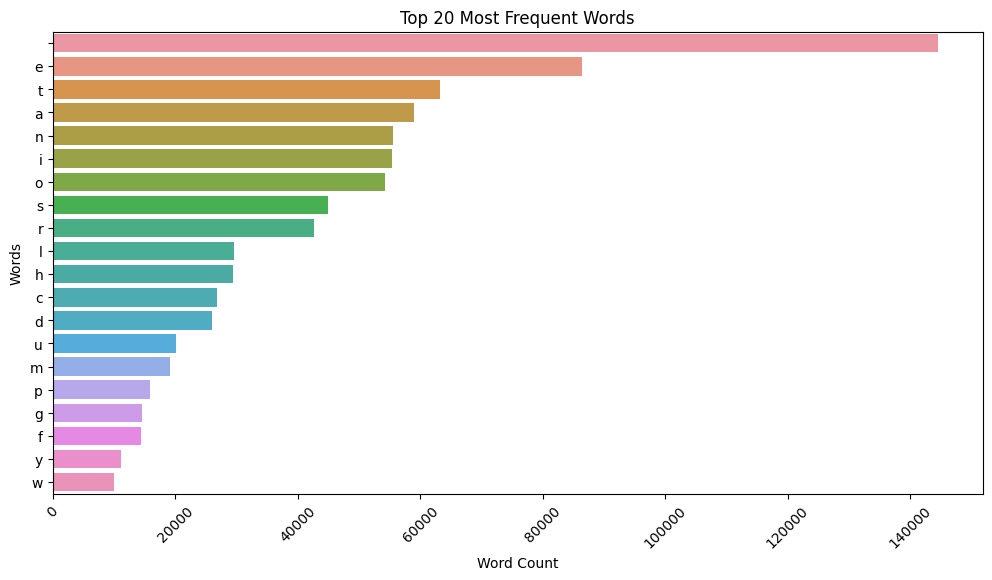

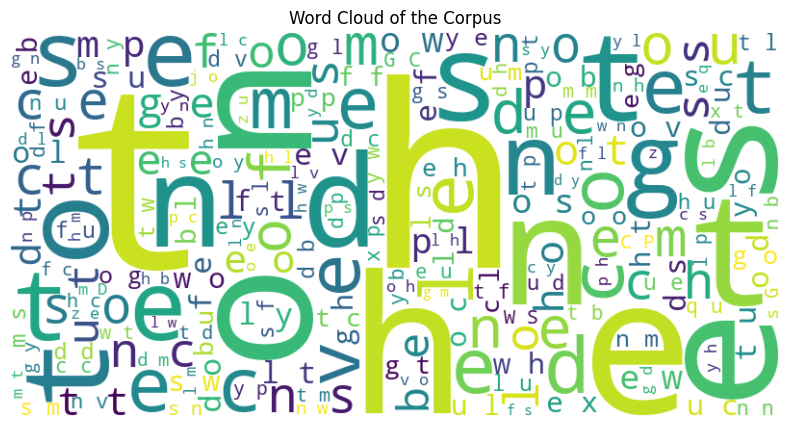

In [ ]:


  # Add this import

# Assuming you have already preprocessed and tokenized your text data
# You should have a list of tokenized documents called 'text_data_list'

# Word Frequency Histogram
word_counts = {}
for doc in text_data_list:
    for word in doc:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

# Create a DataFrame for plotting
word_counts_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)

# Select the top N most frequent words
N = 20  # Adjust the number of top words to display
top_words_df = word_counts_df.head(N)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=top_words_df)
plt.title(f"Top {N} Most Frequent Words")
plt.xlabel("Word Count")
plt.ylabel("Words")
plt.xticks(rotation=45)
plt.show()

# Word Cloud
text = ' '.join([' '.join(doc) for doc in text_data_list])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of the Corpus")
plt.show()

# Sentiment Analysis (assuming you have sentiment scores)
# Plot sentiment trends over time, if applicable

# Topic Distribution (assuming you have topic assignments)
# Plot the distribution of topics across documents, if applicable


Topic Modeling & Sentiment Analysis


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\thesh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [ ]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create a list to store sentiment scores for each scraped text
sentiment_scores = []

# Iterate through the URLs and extract data one by one
for url in urls:
    article_title, article_text = extract_data(url)

    # Check if both title and text are available
    if article_title and article_text:
        # Perform sentiment analysis on the article text
        sentiment = sid.polarity_scores(article_text)
        sentiment_scores.append(sentiment)

# Now, sentiment_scores contains sentiment analysis results for each web-scraped article text
# You can further process or analyze these results as needed

# Example: Printing the sentiment scores
for i, sentiment in enumerate(sentiment_scores):
    print(f"Sentiment for article {i + 1} - Positive: {sentiment['pos']}, Negative: {sentiment['neg']}, Neutral: {sentiment['neu']}, Compound: {sentiment['compound']}")


HTTP error occurred for https://insights.blackcoffer.com/how-neural-networks-can-be-applied-in-various-areas-in-the-future/: 404 Client Error: Not Found for url: https://insights.blackcoffer.com/how-neural-networks-can-be-applied-in-various-areas-in-the-future/
HTTP error occurred for https://insights.blackcoffer.com/covid-19-environmental-impact-for-the-future/: 404 Client Error: Not Found for url: https://insights.blackcoffer.com/covid-19-environmental-impact-for-the-future/
Sentiment for article 1 - Positive: 0.13, Negative: 0.019, Neutral: 0.851, Compound: 0.9994
Sentiment for article 2 - Positive: 0.152, Negative: 0.011, Neutral: 0.837, Compound: 0.9987
Sentiment for article 3 - Positive: 0.124, Negative: 0.042, Neutral: 0.834, Compound: 0.9986
Sentiment for article 4 - Positive: 0.19, Negative: 0.051, Neutral: 0.76, Compound: 0.9997
Sentiment for article 5 - Positive: 0.19, Negative: 0.051, Neutral: 0.76, Compound: 0.9997
Sentiment for article 6 - Positive: 0.113, Negative: 0.018

Exploratory Data Analysis (EDA)


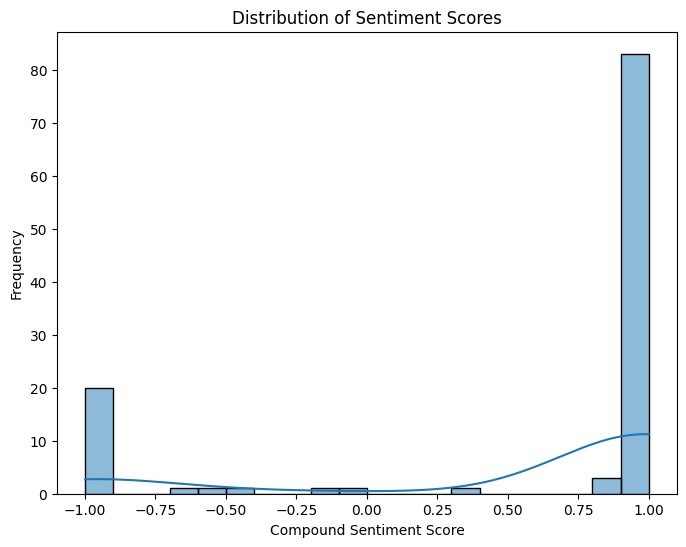

Number of Positive Articles: 87
Number of Negative Articles: 25
Number of Neutral Articles: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sentiment_scores is a list of sentiment scores as dictionaries
# Example format: [{'pos': 0.1, 'neg': 0.2, 'neu': 0.7, 'compound': -0.25}, ...]

# Extract the compound scores from sentiment_scores
compound_scores = [score['compound'] for score in sentiment_scores]

# Plot a histogram to visualize the distribution of compound scores
plt.figure(figsize=(8, 6))
sns.histplot(compound_scores, bins=20, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Calculate the number of positive, negative, and neutral articles
positive_articles = sum(1 for score in compound_scores if score > 0.05)
negative_articles = sum(1 for score in compound_scores if score < -0.05)
neutral_articles = len(compound_scores) - (positive_articles + negative_articles)

print(f"Number of Positive Articles: {positive_articles}")
print(f"Number of Negative Articles: {negative_articles}")
print(f"Number of Neutral Articles: {neutral_articles}")


Identify Key Insights

In [ ]:
# Filter articles with extremely positive sentiments
extremely_positive_articles = []
threshold_positive = 0.8  # Adjust this threshold as needed

for i in range(1, len(df) + 1):
    sentiment = df[f'Sentiment for article {i}']
    if sentiment['Compound'] >= threshold_positive:
        extremely_positive_articles.append(i)

# Filter articles with extremely negative sentiments
extremely_negative_articles = []
threshold_negative = -0.8  # Adjust this threshold as needed

for i in range(1, len(df) + 1):
    sentiment = df[f'Sentiment for article {i}']
    if sentiment['Compound'] <= threshold_negative:
        extremely_negative_articles.append(i)

# Print the titles and URLs of extremely positive articles
print("Extremely Positive Articles:")
for i in extremely_positive_articles:
    print(f"Title: {df.at[i, 'Title']}")
    print(f"URL: {df.at[i, 'URL']}\n")

# Print the titles and URLs of extremely negative articles
print("Extremely Negative Articles:")
for i in extremely_negative_articles:
    print(f"Title: {df.at[i, 'Title']}")
    print(f"URL: {df.at[i, 'URL']}\n")


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

data = {
    'URL': ["https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-3-2/",
"https://insights.blackcoffer.com/rise-of-e-health-and-its-impact-on-humans-by-the-year-2030/",
"https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030-2/",
"https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2/",
"https://insights.blackcoffer.com/rise-of-telemedicine-and-its-impact-on-livelihood-by-2040-2-2/",
"https://insights.blackcoffer.com/rise-of-chatbots-and-its-impact-on-customer-support-by-the-year-2040/",
"https://insights.blackcoffer.com/rise-of-e-health-and-its-imapct-on-humans-by-the-year-2030/",
"https://insights.blackcoffer.com/how-does-marketing-influence-businesses-and-consumers/",
"https://insights.blackcoffer.com/how-advertisement-increase-your-market-value/",
"https://insights.blackcoffer.com/negative-effects-of-marketing-on-society/",
"https://insights.blackcoffer.com/how-advertisement-marketing-affects-business/",
"https://insights.blackcoffer.com/rising-it-cities-will-impact-the-economy-environment-infrastructure-and-city-life-by-the-year-2035/",
"https://insights.blackcoffer.com/rise-of-ott-platform-and-its-impact-on-entertainment-industry-by-the-year-2030/",
"https://insights.blackcoffer.com/rise-of-electric-vehicles-and-its-impact-on-livelihood-by-2040/",
"https://insights.blackcoffer.com/rise-of-electric-vehicle-and-its-impact-on-livelihood-by-the-year-2040/",
"https://insights.blackcoffer.com/oil-prices-by-the-year-2040-and-how-it-will-impact-the-world-economy/",
"https://insights.blackcoffer.com/an-outlook-of-healthcare-by-the-year-2040-and-how-it-will-impact-human-lives/",
"https://insights.blackcoffer.com/ai-in-healthcare-to-improve-patient-outcomes/",
"https://insights.blackcoffer.com/what-if-the-creation-is-taking-over-the-creator/",
"https://insights.blackcoffer.com/what-jobs-will-robots-take-from-humans-in-the-future/",
"https://insights.blackcoffer.com/will-machine-replace-the-human-in-the-future-of-work/",
"https://insights.blackcoffer.com/will-ai-replace-us-or-work-with-us/",
"https://insights.blackcoffer.com/man-and-machines-together-machines-are-more-diligent-than-humans-blackcoffe/",
"https://insights.blackcoffer.com/in-future-or-in-upcoming-years-humans-and-machines-are-going-to-work-together-in-every-field-of-work/",
"https://insights.blackcoffer.com/how-neural-networks-can-be-applied-in-various-areas-in-the-future/",
"https://insights.blackcoffer.com/how-machine-learning-will-affect-your-business/",
"https://insights.blackcoffer.com/deep-learning-impact-on-areas-of-e-learning/",
"https://insights.blackcoffer.com/how-to-protect-future-data-and-its-privacy-blackcoffer/",
"https://insights.blackcoffer.com/how-machines-ai-automations-and-robo-human-are-effective-in-finance-and-banking/",
"https://insights.blackcoffer.com/ai-human-robotics-machine-future-planet-blackcoffer-thinking-jobs-workplace/",
"https://insights.blackcoffer.com/how-ai-will-change-the-world-blackcoffer/",
"https://insights.blackcoffer.com/future-of-work-how-ai-has-entered-the-workplace/",
"https://insights.blackcoffer.com/ai-tool-alexa-google-assistant-finance-banking-tool-future/",
"https://insights.blackcoffer.com/ai-healthcare-revolution-ml-technology-algorithm-google-analytics-industrialrevolution/",
"https://insights.blackcoffer.com/all-you-need-to-know-about-online-marketing/",
"https://insights.blackcoffer.com/evolution-of-advertising-industry/",
"https://insights.blackcoffer.com/how-data-analytics-can-help-your-business-respond-to-the-impact-of-covid-19/",
"https://insights.blackcoffer.com/covid-19-environmental-impact-for-the-future/",
"https://insights.blackcoffer.com/environmental-impact-of-the-covid-19-pandemic-lesson-for-the-future/",
"https://insights.blackcoffer.com/how-data-analytics-and-ai-are-used-to-halt-the-covid-19-pandemic/",
"https://insights.blackcoffer.com/difference-between-artificial-intelligence-machine-learning-statistics-and-data-mining/",
"https://insights.blackcoffer.com/how-python-became-the-first-choice-for-data-science/",
"https://insights.blackcoffer.com/how-google-fit-measure-heart-and-respiratory-rates-using-a-phone/",
"https://insights.blackcoffer.com/what-is-the-future-of-mobile-apps/",
"https://insights.blackcoffer.com/impact-of-ai-in-health-and-medicine/",
"https://insights.blackcoffer.com/telemedicine-what-patients-like-and-dislike-about-it/",
"https://insights.blackcoffer.com/how-we-forecast-future-technologies/",
"https://insights.blackcoffer.com/can-robots-tackle-late-life-loneliness/",
"https://insights.blackcoffer.com/embedding-care-robots-into-society-socio-technical-considerations/",
"https://insights.blackcoffer.com/management-challenges-for-future-digitalization-of-healthcare-services/",
"https://insights.blackcoffer.com/are-we-any-closer-to-preventing-a-nuclear-holocaust/",
"https://insights.blackcoffer.com/will-technology-eliminate-the-need-for-animal-testing-in-drug-development/",
"https://insights.blackcoffer.com/will-we-ever-understand-the-nature-of-consciousness/",
"https://insights.blackcoffer.com/will-we-ever-colonize-outer-space/",
"https://insights.blackcoffer.com/what-is-the-chance-homo-sapiens-will-survive-for-the-next-500-years/",
"https://insights.blackcoffer.com/why-does-your-business-need-a-chatbot/",
"https://insights.blackcoffer.com/how-you-lead-a-project-or-a-team-without-any-technical-expertise/",
"https://insights.blackcoffer.com/can-you-be-great-leader-without-technical-expertise/",
"https://insights.blackcoffer.com/how-does-artificial-intelligence-affect-the-environment/",
"https://insights.blackcoffer.com/how-to-overcome-your-fear-of-making-mistakes-2/",
"https://insights.blackcoffer.com/is-perfection-the-greatest-enemy-of-productivity/",
"https://insights.blackcoffer.com/global-financial-crisis-2008-causes-effects-and-its-solution/",
"https://insights.blackcoffer.com/gender-diversity-and-equality-in-the-tech-industry/",
"https://insights.blackcoffer.com/how-to-overcome-your-fear-of-making-mistakes/",
"https://insights.blackcoffer.com/how-small-business-can-survive-the-coronavirus-crisis/",
"https://insights.blackcoffer.com/impacts-of-covid-19-on-vegetable-vendors-and-food-stalls/",
"https://insights.blackcoffer.com/impacts-of-covid-19-on-vegetable-vendors/",
"https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-tourism-aviation-industries/",
"https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-sports-events-around-the-world/",
"https://insights.blackcoffer.com/changing-landscape-and-emerging-trends-in-the-indian-it-ites-industry/",
"https://insights.blackcoffer.com/online-gaming-adolescent-online-gaming-effects-demotivated-depression-musculoskeletal-and-psychosomatic-symptoms/",
"https://insights.blackcoffer.com/human-rights-outlook/",
"https://insights.blackcoffer.com/how-voice-search-makes-your-business-a-successful-business/",
"https://insights.blackcoffer.com/how-the-covid-19-crisis-is-redefining-jobs-and-services/",
"https://insights.blackcoffer.com/how-to-increase-social-media-engagement-for-marketers/",
"https://insights.blackcoffer.com/impacts-of-covid-19-on-streets-sides-food-stalls/",
"https://insights.blackcoffer.com/coronavirus-impact-on-energy-markets-2/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-5/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-4/",
"https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work-2/",
"https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work-3/",
"https://insights.blackcoffer.com/travel-and-tourism-outlook/",
"https://insights.blackcoffer.com/gaming-disorder-and-effects-of-gaming-on-health/",
"https://insights.blackcoffer.com/what-is-the-repercussion-of-the-environment-due-to-the-covid-19-pandemic-situation/",
"https://insights.blackcoffer.com/what-is-the-repercussion-of-the-environment-due-to-the-covid-19-pandemic-situation-2/",
"https://insights.blackcoffer.com/impact-of-covid-19-pandemic-on-office-space-and-co-working-industries/",
"https://insights.blackcoffer.com/contribution-of-handicrafts-visual-arts-literature-in-the-indian-economy/",
"https://insights.blackcoffer.com/how-covid-19-is-impacting-payment-preferences/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-2/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis/",
"https://insights.blackcoffer.com/covid-19-how-have-countries-been-responding/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-2/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-3/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-3/",
"https://insights.blackcoffer.com/estimating-the-impact-of-covid-19-on-the-world-of-work/",
"https://insights.blackcoffer.com/covid-19-how-have-countries-been-responding-2/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work-4/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-2/",
"https://insights.blackcoffer.com/lessons-from-the-past-some-key-learnings-relevant-to-the-coronavirus-crisis-3/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry-4/",
"https://insights.blackcoffer.com/why-scams-like-nirav-modi-happen-with-indian-banks/",
"https://insights.blackcoffer.com/impact-of-covid-19-on-the-global-economy/",
"https://insights.blackcoffer.com/impact-of-covid-19coronavirus-on-the-indian-economy-2/",
"https://insights.blackcoffer.com/impact-of-covid-19-on-the-global-economy-2/",
"https://insights.blackcoffer.com/impact-of-covid-19-coronavirus-on-the-indian-economy-3/",
"https://insights.blackcoffer.com/should-celebrities-be-allowed-to-join-politics/",
"https://insights.blackcoffer.com/how-prepared-is-india-to-tackle-a-possible-covid-19-outbreak/",
"https://insights.blackcoffer.com/how-will-covid-19-affect-the-world-of-work/",
"https://insights.blackcoffer.com/controversy-as-a-marketing-strategy/",
"https://insights.blackcoffer.com/coronavirus-impact-on-the-hospitality-industry/",
"https://insights.blackcoffer.com/coronavirus-impact-on-energy-markets/",
"https://insights.blackcoffer.com/what-are-the-key-policies-that-will-mitigate-the-impacts-of-covid-19-on-the-world-of-work/",
"https://insights.blackcoffer.com/marketing-drives-results-with-a-focus-on-problems/",
"https://insights.blackcoffer.com/continued-demand-for-sustainability/"


],
    'text_column': ['This is the text of article 1...', 'Here is the content of article 2...', ...]
}

your_dataframe = pd.DataFrame(data)


In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have preprocessed and tokenized text data stored in text_data_list
# You also have the LDA model already built as lda_model

# Refine the LDA model
# You can adjust the number of topics and passes for better results
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=50)

# Print the refined topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Sentiment Analysis using VADER
# Assuming you have a DataFrame with URLs and corresponding text content
# Replace 'your_dataframe' with your actual DataFrame containing text data
# Make sure you've installed the NLTK library and downloaded the VADER lexicon

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Create a function to get sentiment scores for each article
def get_sentiment_scores(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

# Apply the sentiment analysis function to your DataFrame
your_dataframe['sentiment_scores'] = your_dataframe['text_column'].apply(get_sentiment_scores)

# Extract sentiment polarity scores
your_dataframe['compound_score'] = your_dataframe['sentiment_scores'].apply(lambda x: x['compound'])

# Classify sentiments based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification
your_dataframe['sentiment'] = your_dataframe['compound_score'].apply(classify_sentiment)

# Print the sentiment analysis results
print(your_dataframe[['URL', 'sentiment']])

# Visualize sentiment distribution, e.g., using matplotlib or seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=your_dataframe, x='sentiment')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [ ]:

from nltk.tokenize import word_tokenize

# Assuming you have a DataFrame named 'your_dataframe' with a 'text_column'
# Replace 'text_column' with the actual name of your text column

# Step 1: Data Preprocessing
# Tokenize and preprocess the text data
your_dataframe['tokenized_text'] = your_dataframe['text_column'].apply(lambda x: word_tokenize(x.lower()))

# Step 2: Create a Dictionary and Corpus
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(your_dataframe['tokenized_text'])

# Create a bag-of-words corpus (Term Document Frequency)
corpus = [dictionary.doc2bow(text) for text in your_dataframe['tokenized_text']]

# Step 3: Build the LDA Model
# Build the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)
